# Supernovae as standard candles
Group 7: Eppacher Felix, Schallar Thomas, Zgureanu Seph

## 1. Scientific background
At the end of their lives, the most massive stars undergo a sudden collapse which leads to an explosion which can outshine entire galaxies, a supernova. Supernovae (SNe) are among the most powerful events in our universe. They release extreme amounts of energy as well as heavy elements, which likely only form during SNe, get ejected into space, enriching the ISM and creating the building blocks for new star formation.
SNe are divided into Type I and Type II. The difference between them is the abscence of hydrogen (H) lines in the spectra of Type I SNe whereas Type II SNe contain obvious H lines. [1]

### Standard candles
Astronomy is restricted to mostly studying objects from afar. For the most part this means astronomers can only observe the light an object emits. An important question when you discover something is: "How far away is it?" When the distances get so large that parallaxes are no longer of use, it is up to the light to answer this question. This is where standard candles come into play. Standard candles are astronomical objects which emit light of a known luminosity. With this information you only have to measure the apparent luminosity, put it in the distance modulus formula, and solve for $d$.

$m-M=5\cdot\log_{10} (d) -5$

where:
- $m$ is the apparent magnitude,
- $M$ is the absolute magnitude,
- $d$ is the distance to the object in parsecs.

An example of standard candles are cepheids which are pulsating stars that change their brightness with a well-defined stable period and amplitude. However at larger distances it is harder to make out single stars inside a galaxy and brighter objects are needed. SNe type Ia are such objects. With typical peak luminosities of about $M_{B} = -19.5 \text{mag}$ they can outshine galaxies. [1]

<img src="https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/typeia1.jpg">

https://astronomy.swin.edu.au/cosmos/T/Type+Ia+Supernova

### Supernovae Type Ia
SNe Ia are characterized by a strong ionized silicon absorbtion in their spectra. A large fraction of observed SNe Ia (∼ 70%) is found to show remarkable homogeneity and a clear empirical relationship between light curve width and peak luminosity, the so-called "Phillips relation". These SNe Ia are commonly referred to as "normal SNe Ia" and have been used to determine cosmological parameters, which has led to the discovery of the accelerating expansion of the universe.

SNe Ia are widely thought to be thermonuclear explosions of white dwarfs in binary systems. However, there is no agreement on the fundamental aspects of the nature of the progenitor systems (i.e. the stars from which SNe Ia arise) and their explosion mechanism neither from theoretical nor observational side. [1]

<img src="https://www.schoolsobservatory.org/sites/default/files/discover/supernovaeproject/Type%20Ia.jpg">

https://www.schoolsobservatory.org/learn/astro/stars/cycle/ia_supernova

### Original idea
Type Ia SNe were first proposed as standard candles by D. Branch and G. A. Tammann in a 1992 paper. [3] SNe Ia are suitable as standard candles because they have a consistently shaped light curve and maximum luminosity, therefore they are easy to tell apart from other astronomical events and objects. 

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e0/Comparative_supernova_type_light_curves.png?20120604155323">

https://commons.wikimedia.org/wiki/File:Comparative_supernova_type_light_curves.png

### Current challanges
Unfortunately one can't simply assume that the peak luminosity of a type Ia SN is exactly -19.5 mag and simply plug in numbers in the distance modulus formula. Some of them shine dimmer or brighter than a standard SN. The fainter SNe's brightness declines more rapidly than that of brighter ones. Thus type Ia SNe aren't standard candles, but rather standardisable. There are various methods for this, which turn SNe Ia into true standard candles. [4] Additionally, it is crucial to correct SNe's brightness for extinction. Some SNe's light is dimmed becasue of interstellar dust between the SNe and the observer.

SNe Ia are used to determine distances to other galaxies, as well as constrain cosmological parameters. An important assumption that scientists make is that nearby SNe are physically similar to extragalactic SNe. Nearby SNe, which are close enough for their distances to be determined with other methods, were used for distance callibration. It is possible that nearby SNe are part of a biased population. Such was the case for cepheids, nearby cepheids being population I stars whith a higher metallicity. Discoverting that distant cepheids are population II stars, and therefore much brighter, increased the distances as well as the estimated diameter of the Milky Way by around a factor of 2. Therefore it is still an open question wether type Ia SNe can truly be used as standard candles.

### How is data collected?
High-quality data collection on Type Ia supernovae (SNe Ia) began with the Calán/Tololo survey in the 1990s, led by Mario Hamuy and colleagues. This foundational survey provided the first systematic dataset for 29 nearby SNe Ia, using CCD photometry to measure light curves and distances up to redshifts of 0.1. Currently, the Harvard-Smithsonian Center for Astrophysics (CfA) manages one of the largest ongoing SNe Ia campaigns at the Fred Lawrence Whipple Observatory (FLWO), where high-quality, multicolor photometric and spectroscopic data have been collected since 1993, expanding the dataset of nearby SNe Ia.

The CfA program relies on a network of amateur and professional astronomers for new SNe discoveries, receiving notifications coordinated by the IAU’s Central Bureau for Astronomical Telegrams. Once a supernova is confirmed and classified, the CfA team conducts follow-up photometry using CCD detectors, tracking each SNe’s brightness over time in multiple passbands (UBVRI) to create light curves. Observations are made over several weeks, covering each supernova’s peak and decline to produce data for accurate distance measurements. Data processing involves photometric calibration, background, and galaxy subtraction to ensure precise light isolation. [2]

## 2. Data Distributions

### Plot of SNe light curves

To get an overview of what's going on, we plotted out all data files that contained values of the apparent luminosity for all five filters (U,B,V,R,I) and with at least 20 observations. Since the data files contained error margins for the values of the light intensities, we made them visible with error bars.

The error bars show that the measurements were not taken at regular intervals. In some cases, the intervals are greater than 100 days, making them difficult to compare.

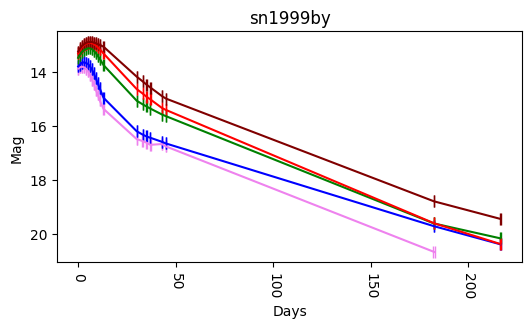

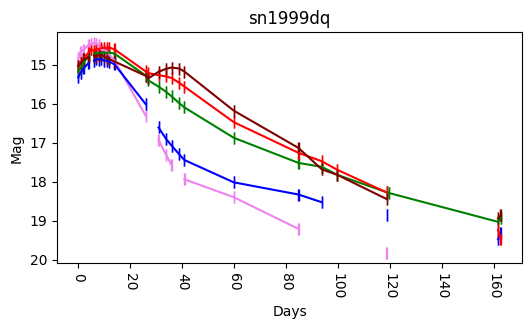

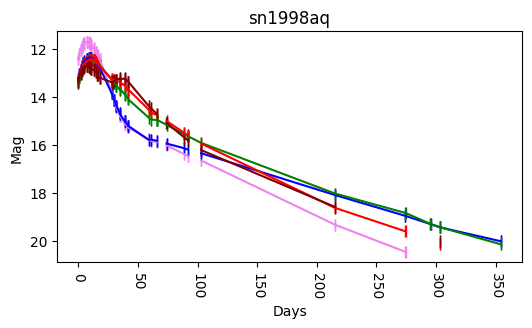

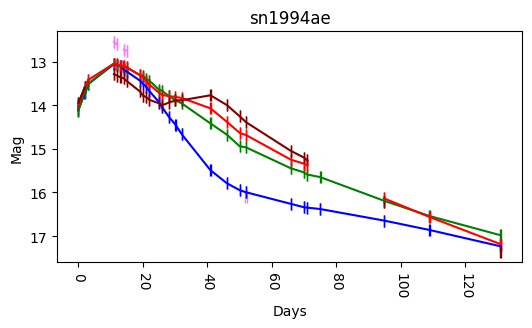

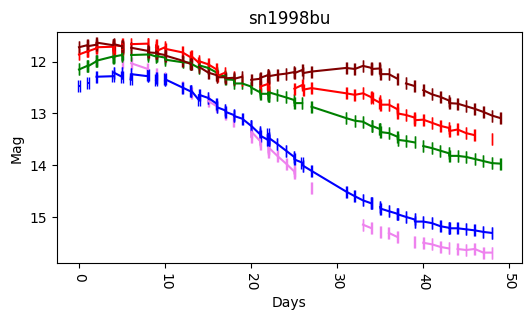

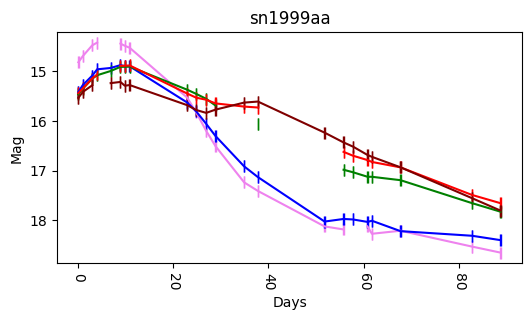

In [34]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = glob.glob("Supernova_all/cfalc_allsn/*_UBVRI.dat")

for file in dataset:
    try:
        # Read the data file into a DataFrame
        df = pd.read_table(file, comment="#", sep="[ \t]+", engine="python", header=0, names=["HJD", "U", "Uerr", "B", "Berr", "V", "Verr", "R", "Rerr", "I", "Ierr"])

        # plot only, if 20+ observations are available
        if len(df) >= 20:
            # Replace missing data with NaN
            df[df == 99.999] = float("NaN")
            df[df == 99.99] = float("NaN")

            '''
            # Adjust HJD if it's smaller than 2450000
            if df["HJD"].iat[0] < 2450000:
                df["HJD"] += 2450000

            for i in df["HJD"].index:
                df["HJD"].iat[i]= Time(df["HJD"].iat[i], format='jd', scale='utc').iso[0:10]
            '''

            # convert HJD to days from first observation
            df["HJD"]-= df["HJD"].iat[0]
            
            plt.figure(figsize=(6, 3))
            # Plot light curves for each filter
            for filter, color in [["U", "violet"], ["B", "blue"], ["V", "green"], ["R", "red"], ["I", "#800000"]]:
                plt.errorbar(df["HJD"].values, df[filter].values, label=filter, color=color, xerr=df[filter+"err"].values, capsize=4)

        
            plt.title(file[26:34])
            plt.xlabel("Days")
            plt.ylabel("Mag")
            plt.xticks(rotation=270)
            plt.gca().invert_yaxis()
            plt.show()
            
        
    except Exception as e:
        print(f"{file} ignored due to error: {e}")


We can see that the brightness of every SNe peaks and then is decreasing over time. Since we have every type of SN in this data set, each of them with a different characteristic lightcurve, we cannot compare them to each other without knowing their types. Moreover only type Ia SNe have stadardisible lightcurves and can be used as standard candles. Therefore we shall use the data set only containing known SNe Ia going forward.

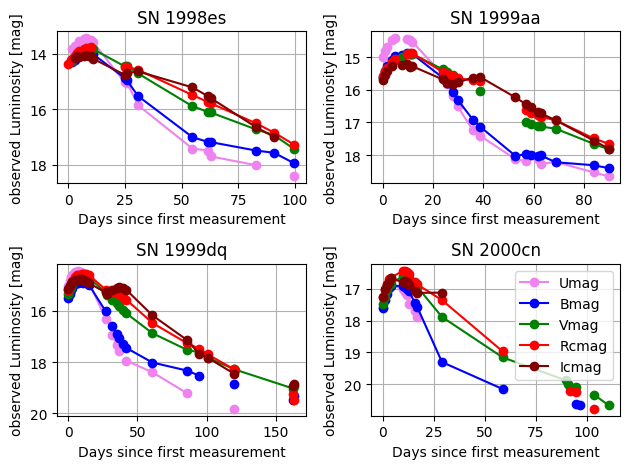

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

column_names = ["SN", "HJD", "Umag", "e_Umag", "Bmag", "e_Bmag", 
                "Vmag", "e_Vmag", "Rcmag", "e_Rcmag", "Icmag", "e_Icmag", "Det_Filt"]
colspecs = [(0, 9), (10, 20), (21, 27), (28, 33), (34, 40), (41, 46), 
            (47, 53), (54, 59), (60, 66), (67, 72), (73, 79), (80, 85), (86, 110)]

i=0
df = pd.read_fwf("Supernova_Ia/table4.dat", colspecs=colspecs, names=column_names, na_values="?")

grouped = df.groupby("SN")

for sn_name, sn_data in grouped:
    if len(sn_data)>=20:
        i+=1
        #plt.figure(figsize=(8, 6)) 
        plt.subplot(2,2,i)

        sn_data = sn_data.sort_values("HJD")  
        sn_data["Days"] = sn_data["HJD"] - sn_data["HJD"].min()

        filters = {"Umag": "violet", "Bmag": "blue", "Vmag": "green", "Rcmag": "red", "Icmag": "#800000"}

        for filter, color in filters.items():
            if not sn_data[filter].isna().all():  
                plt.plot(sn_data["Days"], sn_data[filter], label=filter, color=color, marker="o", linestyle="-")

        plt.gca().invert_yaxis()  
        plt.xlabel("Days since first measurement")
        plt.ylabel("observed Luminosity [mag]")
        plt.title(f"{sn_name}")
        plt.grid(True)

plt.legend()
plt.tight_layout()
plt.show()


We observe a second maximum in the infrared filter measurement of type Ia SNe. This is possibly due to the ionization evolution of iron group elements in the ejecta. This secondary maximum seems to be very consistent in the brighter SNe, making them perfect candidates for standard candles. Moreover, observing SNe in infrared largerly eliminated uncertainties in the reddening corrections. However SNe are typically quite dim in the infrared, making distant SNe harder to observe and posing a challange for cosmological studies. [5]

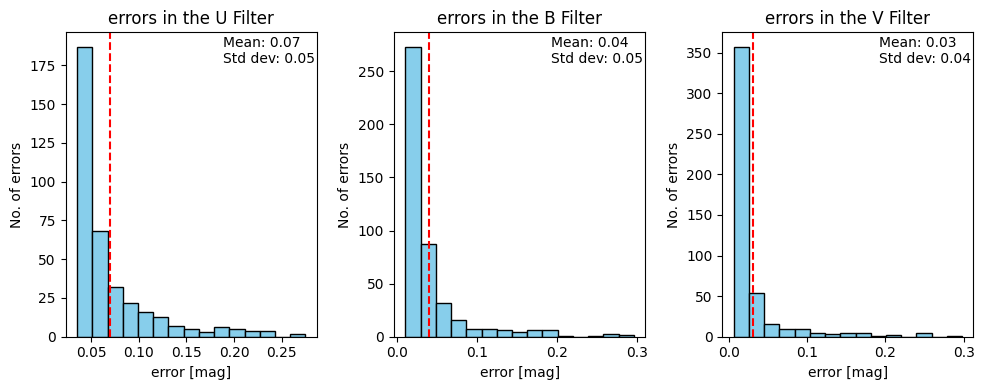

In [36]:
e_filters = ["e_Umag", "e_Bmag", "e_Vmag"]
i=0
plt.figure(figsize=(10, 4))
for f in e_filters:
    i+=1
    e_filter_df = df[f]
    mean = round(e_filter_df.mean(), 2)
    std = round(e_filter_df.std(), 2)
    plt.subplot(1,3,i)
    #plt.figure(figsize=(4, 3))
    plt.hist(e_filter_df, bins=15, color='skyblue', edgecolor='black')
    plt.xlabel(f'error [mag]')
    plt.ylabel('No. of errors')
    plt.title(f'errors in the {f[2:3]} Filter')
    plt.text(0.625 , 0.9 , f'Mean: {mean} \nStd dev: {std}', 
             transform=plt.gca().transAxes )
    plt.axvline(mean, color = 'red', linestyle = 'dashed')
#plt.figure(figsize=(10, 5))
plt.tight_layout()
plt.show()

We observe a power law distribution of errors in all filters, only the first 3 were plotted. This indicates that small errors are most common, which is typical for a large signal to noise ratio in photometric measurements.

## 3. Statistical Inference
With the Phillips Relation we can determine the absolute magnitude of a SNe Ia. [6]

$M_b = -21.726 + 2.698 \cdot \Delta m_{15}$

where:
- $M_b$ is the maximum absolute luminoisty in the B filter
- $\Delta m_{15}$ is the change in brightness in the B filter 15 days after the maximum

In [ ]:
from scipy.interpolate import CubicSpline

Mags_Delm15 = []

def phillips_relation(delta_m_15):
    M_max_B = -21.726 + 2.698*delta_m_15
    return M_max_B

for sn_name, sn_data in grouped:
    try:
        sn_data = sn_data.dropna(subset=["HJD", "Bmag"])

        # Find time of maximum brightness and corresponding magnitude
        start_idx = sn_data["HJD"].idxmin() # Index of first item of specific SN 
        max_idx = sn_data["Bmag"].idxmin() # Index of maximum brightness
        max_idx = max_idx - start_idx #index correction, df -> sn df index
        max_day = float(sn_data["HJD"].iat[max_idx]) # Date of maximum brightness 
        m_b_max = float(sn_data["Bmag"].iat[max_idx]) # Max brightness
        max_day15 = max_day + 15 # Date 15 days after maximum
        jd_known = sn_data["HJD"].values
        mag_known = sn_data["Bmag"].values
        spl = CubicSpline(jd_known,mag_known)
        m_b_15 = spl(max_day15) # Interpolate an approximate value for mag on 15th day

        # Calculate ∆m15
        delta_m15 = m_b_15 - m_b_max
        #print("SN", sn_name)
        #print("max apparent Bmag:", m_b_max)
        M_B = phillips_relation(delta_m15) 
        #print("Absolute mag:", M_B, "mag")

        # distance to the supernova
        mu = m_b_max - M_B
        distance_pc = 10 ** ((mu + 5) / 5)
        distance_mpc = distance_pc/(10**6)
        #print("distance:", distance_mpc, "Mpc")

        if M_B > (-22):
            Mags_Delm15.append((M_B, m_b_max, delta_m15, distance_mpc)) #max abs, max obs, del m 15, dist [Mpc]
        else:
            print('Outlier skipped')

        print()

    except Exception as oops:
        print(f"{sn_name} ignored due to error: {oops}")



# Creates numpy array out of list for plotting/ data analysis
data_array = np.array(Mags_Delm15)

max_abs_mag = data_array[:,0]
max_obs_mag = data_array[:,1]
del_m = data_array[:,2]
dist = data_array[:,3]



### Combined quantity data plot

This is a scatterplot showing the relationship between the maximum observed magnitude of the Supernova and the difference in magnitude between the peak brightness and the brightness of the SN 15 days after the peak.

We can observe that most SNe get around 0.5 - 2 magnitude dimmer within 15 days

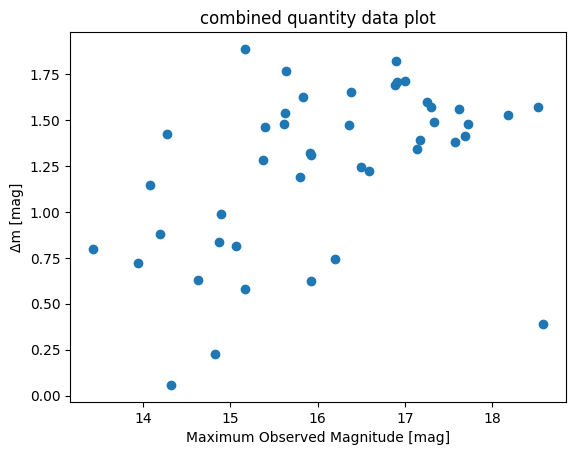

In [38]:
plt.scatter(max_obs_mag, del_m)
#plt.semilogy()
plt.xlabel('Maximum Observed Magnitude [mag]')
plt.ylabel('Δm [mag]')
plt.title('combined quantity data plot')

plt.show()

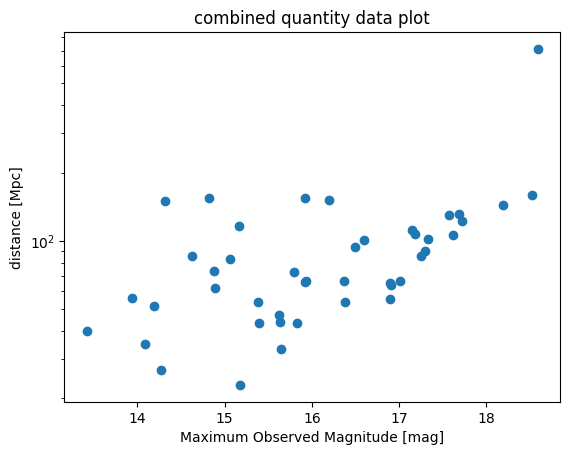

In [39]:
plt.scatter(max_obs_mag, dist)
plt.semilogy()
plt.xlabel('Maximum Observed Magnitude [mag]')
plt.ylabel('distance [Mpc]')
plt.title('combined quantity data plot')

plt.show()

### Maximum Absolute Magnitude vs Δm (The Phillips Relation)

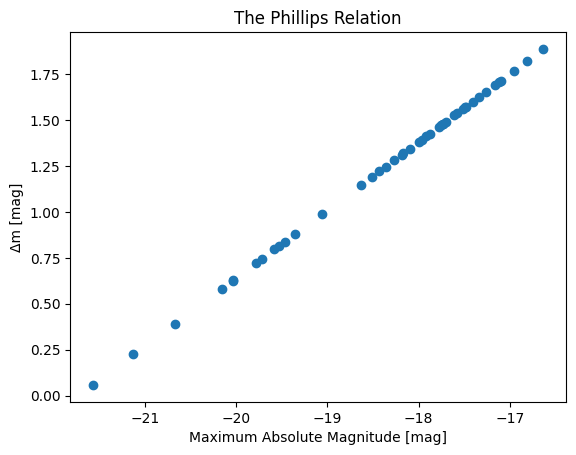

In [40]:
plt.scatter(max_abs_mag, del_m)
plt.xlabel('Maximum Absolute Magnitude [mag]')
plt.ylabel('Δm [mag]')
plt.title('The Phillips Relation')

plt.show()



Here we have a perfect linear correlation between the decline rate $\Delta m$ and the absolute magnitude of the SNe. However, this is just because we already assumed this so called Phillips relation and calculated the absolute magnitudes with a linear dependance on $\Delta m$ which means that this graph does not give us additional insights.

### Maximum Absolute Magnitude of a type Ia Supernova

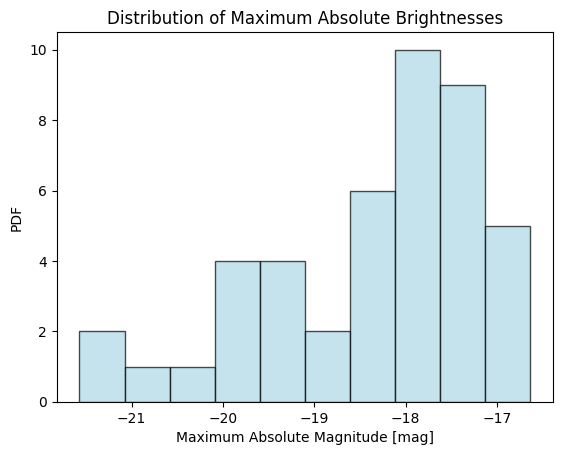

In [41]:
plt.hist(max_abs_mag, bins=10, edgecolor='black',color = 'lightblue', alpha=0.7)

plt.xlabel('Maximum Absolute Magnitude [mag]')
plt.ylabel('PDF')
plt.title('Distribution of Maximum Absolute Brightnesses')

plt.show()



### Analysing the distribution of Maximum Absolute Magnitudes 

Mean =  -17.650065485947078
Standard deviation =  1.3000150637133867
1-sigma Confidence Interval: (-18.950080549660463, -16.350050422233693)


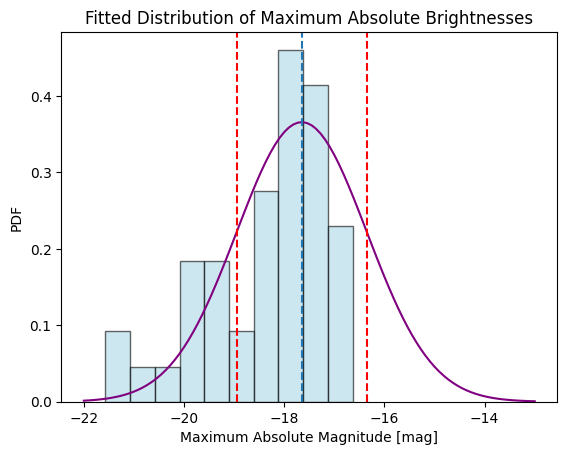

In [42]:
from scipy.optimize import curve_fit

counts, bins, patches = plt.hist(max_abs_mag, bins = 10, edgecolor='black', color = 'lightblue', density = True, alpha=0.6, label = 'SNe')

plt.xlabel('Maximum Absolute Magnitude [mag]')
plt.ylabel('PDF')
plt.title('Fitted Distribution of Maximum Absolute Brightnesses')


#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

#calculate bin center to use as y data to fit
bins = (bins[:-1] + np.diff(bins) / 2)

#create an arbitrary x axis to fit
x_values_to_fit = np.linspace(-22,-13,100)

# fit the data and plot the result
param, cov = curve_fit(gaussian, bins,counts, p0=[1, np.mean(max_abs_mag), np.std(max_abs_mag)])
plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5)

# access fit parameters
mean_gaus = param[1] #mean of gaussian dist
std_gaus   = param[2] #stdev of the dist

print('Mean = ', mean_gaus)
print('Standard deviation = ', std_gaus)
print(f"1-sigma Confidence Interval: ({mean_gaus-std_gaus}, {mean_gaus+std_gaus})")

plt.axvline(mean_gaus, linestyle = 'dashed')
plt.axvline(mean_gaus - std_gaus, color = 'red', linestyle = 'dashed')
plt.axvline(mean_gaus + std_gaus, color = 'red', linestyle = 'dashed')

plt.show()

The

2.5-sigma Confidence Interval: (-20.90, -14.40)


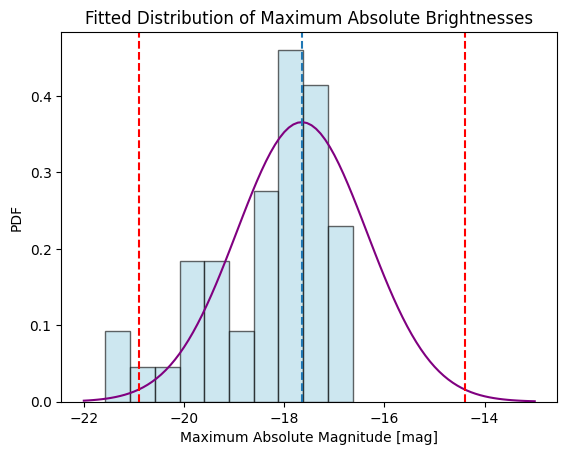

In [43]:
def n_sigma_confidence_interval(sigma, mu, n):
    # Calculate the confidence interval
    lower_bound = mu - n * sigma
    upper_bound = mu + n * sigma
    
    return lower_bound, upper_bound


n = 2.5

lower, upper = n_sigma_confidence_interval(std_gaus, mean_gaus, n)

print(f"{n}-sigma Confidence Interval: ({lower:.2f}, {upper:.2f})")


# Fitted histogram plotting

counts, bins, patches = plt.hist(max_abs_mag, bins = 10, edgecolor='black', color = 'lightblue', density = True, alpha=0.6, label = 'SNe')

plt.xlabel('Maximum Absolute Magnitude [mag]')
plt.ylabel('PDF')
plt.title('Fitted Distribution of Maximum Absolute Brightnesses')


plt.plot(x_values_to_fit, gaussian(x_values_to_fit, *param), '-', color = 'purple', lw=1.5)


plt.axvline(mean_gaus, linestyle = 'dashed')
plt.axvline(lower, color = 'red', linestyle = 'dashed')
plt.axvline(upper, color = 'red', linestyle = 'dashed')

plt.show()

## 4. Hypothesis Testing

In this subsection we will discuss the combined quantity data plot "Distance in Mpc vs the Maximum Observed Brightness". Let's define our combined quantity as X:=(10^m)/d
As a refresher, here is the plot:

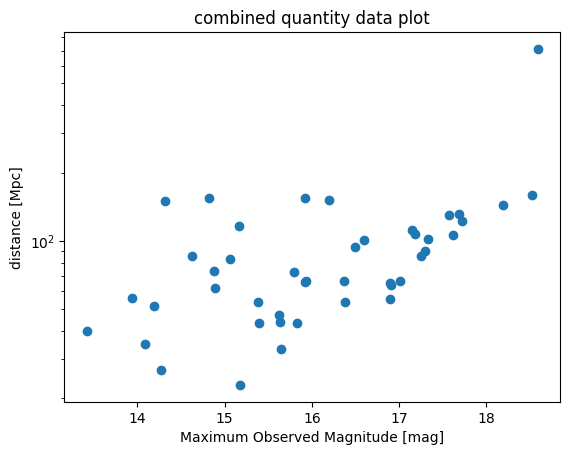

In [44]:
plt.scatter(max_obs_mag, dist)
plt.semilogy()
plt.xlabel('Maximum Observed Magnitude [mag]')
plt.ylabel('distance [Mpc]')
plt.title('combined quantity data plot')

plt.show()

We expected a stronger correlation between these two measurements, since we want to use Type Ia supernovae to determine the distance to far away galaxies. We would like to find out if the spread of the data is statistically significant.

H_0: The value of X can be considered constant for all SNe Ia

H_a: The value of X can NOT be considered constant for all SNe Ia

Let's choose a subset and test this hypothesis. 
Let the subset be SNe within 100 MPc of the sun.

In [45]:
sub_data = data_array[data_array[:, 3] <= 100]
print(sub_data)

#max abs mag   max obs mag    del m     distance

[[-17.73273463  15.62         1.48008353  46.83245515]
 [-18.27231134  15.379        1.28009216  53.73562052]
 [-18.62903864  14.085        1.147873    34.89857769]
 [-17.16659816  16.892        1.68991914  64.82158292]
 [-20.03354492  14.626        0.62729988  85.48875351]
 [-18.51519631  15.801        1.19006808  72.98594948]
 [-18.1694073   15.917        1.31823303  65.65706414]
 [-17.26542241  16.384        1.65329043  53.68889697]
 [-16.9531421   15.641        1.76903554  33.02390452]
 [-18.18552898  15.93         1.31225761  66.54352396]
 [-19.35505096  14.193        0.87878022  51.24012624]
 [-18.3618666   16.494        1.24689896  93.57790531]
 [-17.77990198  15.398        1.4626012   43.20961484]
 [-17.4870907   17.296        1.57113021  90.49365735]
 [-19.77912523  13.945        0.72159925  55.56803591]
 [-17.1036943   17.007        1.71323414  66.39553279]
 [-19.46662856  14.876        0.83742455  73.8798002 ]
 [-17.87688702  14.27         1.42665418  26.87679033]
 [-17.1184

In [46]:
#calculate X

X_sub = np.divide(np.power(10,sub_data[:,1]),sub_data[:,3])
X_data = np.divide(np.power(10,data_array[:,1]),data_array[:,3])
#print(X_sub)
#print(X_data)

Now that we calculated X=(10^m)/d for both the subset and the entire dataset, let's plot a histogram.

Entire data set stats:
 Mean:  1566223488732640.2 
 Standard deviation 3542060957894339.5
Subset data stats:
 Mean:  424464522089049.06 
 Standard deviation 657855598543322.9


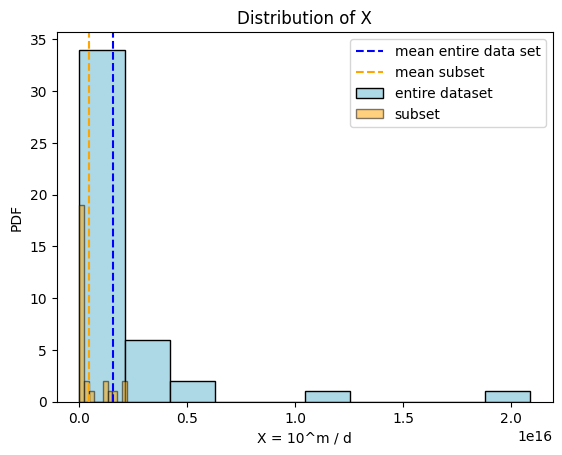

In [47]:
plt.hist(X_data, bins=10, edgecolor = 'black', color = 'lightblue', alpha=1)
plt.hist(X_sub, bins=10, edgecolor = 'black', color = 'orange', alpha=0.5)

mean_X_data = np.mean(X_data)
mean_X_sub = np.mean(X_sub)
std_X_data = np.std(X_data)
std_X_sub = np.std(X_sub)
print('Entire data set stats:\n Mean: ', mean_X_data, '\n Standard deviation', std_X_data)
print('Subset data stats:\n Mean: ', mean_X_sub, '\n Standard deviation', std_X_sub)

plt.axvline(mean_X_data, color = 'blue', linestyle = 'dashed')
plt.axvline(mean_X_sub, color = 'orange', linestyle = 'dashed')
plt.xlabel('X = 10^m / d')
plt.ylabel('PDF')
plt.title('Distribution of X')
plt.legend(['mean entire data set', 'mean subset', 'entire dataset', 'subset'], loc = "upper right")

plt.show()

In [48]:
from scipy.stats import ttest_ind

n = len(X_sub)
t = abs(mean_X_sub - mean_X_data) / (std_X_sub / np.sqrt(n))
print('t = ', t)
t_stat, p_val = ttest_ind(X_data, X_sub)
print('t statistic = ', t_stat)
print('p value = ', p_val)

t =  9.183809606868001
t statistic =  1.6636622014235811
p value =  0.10065098845577831


Let's test out hypothesis with 5% significance level.

In [49]:
if (p_val < 0.05):
    print('We can reject H_0')
else:
    print('We can not reject H_0')

We can not reject H_0


H_0: The value of X can be considered constant for all SNe Ia

H_a: The value of X can NOT be considered constant for all SNe Ia

Since we can not reject H_0 this means that the ratio between the observed magnitude and the distance to a supernova is a constant and does not vary significantly. This is a good result for us, because this means that Type Ia SNe have indeed a constant peak brightness. Therefore we can use these cosmic events to determine distances.

### Absolute Magnitude
Another thing we can test is, if the value of -19.3 mag for SNe Ia you often find in literature is significantly different to our calculated values.

In [50]:
from scipy.stats import ttest_1samp

def hypothesis_test(sample_mean, sample_std, data, hypothesized_mean=-19.3, alpha=0.05):
    
    sample_size = len(data)

    # Perform a one-sample t-test
    t_stat, p_value = ttest_1samp(data, hypothesized_mean)

    # Print the results
    print(f"Sample Mean: {sample_mean:.2f}")
    print(f"Sample Standard Deviation: {sample_std:.2f}")
    print(f"Sample Size: {sample_size}")
    print(f"T-Statistic: {t_stat:.2f}")
    print(f"P-Value: {p_value:.4f}")
    print(f"Interval: ({sample_mean-1.96*sample_std/np.sqrt(sample_size)},{sample_mean+1.96*sample_std/np.sqrt(sample_size)})")

    # Decision rule
    if p_value < alpha:
        print(f"Result: Reject the null hypothesis (H₀), The mean is significantly different from {hypothesized_mean}.")
    else:
        print(f"Fail to reject the null hypothesis (H₀): The mean is not significantly different from {hypothesized_mean}.")
    

    
hypothesis_test(mean_gaus, std_gaus, max_abs_mag)


Sample Mean: -17.65
Sample Standard Deviation: 1.30
Sample Size: 44
T-Statistic: 5.05
P-Value: 0.0000
Interval: (-18.034195389982017,-17.26593558191214)
Result: Reject the null hypothesis (H₀), The mean is significantly different from -19.3.


The hypothesis test suggests that we should reject $H_0$ and the theoretical value of -19.3 is wrong. As we don't expect to disprove well known scientific results here, something has to be wrong. Either with our data and the SNe are all on the fainter side and produce a biased mean or the Phillips Relation is not right.

## 5. Linear Regression
For the last part we again looked if there is a linear correlation between observed magnitudes and distances. Our Problem again is that we only have the distances calculated from the Phillips Relation which we cannot compare to check if they are right.

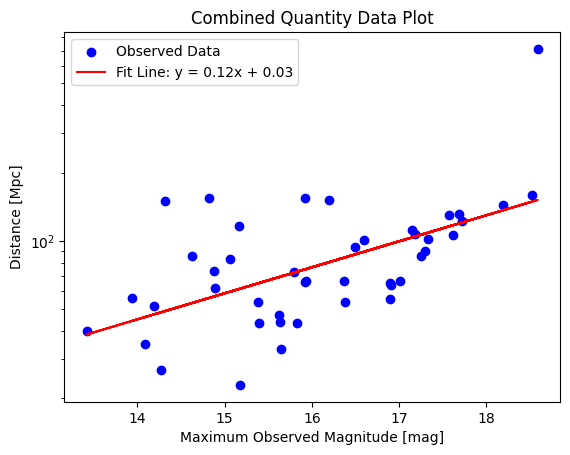

Error:0.025409205105822327


In [51]:
from scipy.stats import linregress

# Perform linear regression (on a log scale for the distances)
log_dist = np.log10(dist)  # Convert distances to log10 scale
slope, intercept, r_value, p_value, std_err = linregress(max_obs_mag, log_dist)

# Generate the best-fit line
fit_line = slope * np.array(max_obs_mag) + intercept

# Convert the fit line back to the original scale
fit_line_exp = 10**fit_line

# Plot the scatter points
plt.scatter(max_obs_mag, dist, label='Observed Data', color='blue')

# Plot the fitted line
plt.plot(max_obs_mag, fit_line_exp, label=f'Fit Line: y = {slope:.2f}x + {intercept:.2f}', color='red')

# Set logarithmic scale for the y-axis
plt.semilogy()

# Add labels and title
plt.xlabel('Maximum Observed Magnitude [mag]')
plt.ylabel('Distance [Mpc]')
plt.title('Combined Quantity Data Plot')
plt.legend()

# Show the plot
plt.show()

print(f"Error:{std_err}")


This line tries to fit log distance to magnitudes (because mag is logarithmic). The idea behind this is that if SNe Ia have a somewhat constant peak luminosity it should get brighter and dimmer also with a somewhat constant dependency on the distance. 
The line fits our dataset as good as it can but it is still difficult to justify this relation.

Calculating some values which give information about the correlation:

In [52]:
from scipy.stats import pearsonr


mean_dist = np.mean(log_dist)
mean_obs_mag = np.mean(max_obs_mag) 
n = len(log_dist)

cov_xy = np.sum((max_obs_mag - mean_obs_mag) * (log_dist - mean_dist)) / (n - 1)

coeff, p_val = pearsonr(max_obs_mag, log_dist)

print(f"Covaraince = {cov_xy}")
print(f'Pearson Coefficient = {coeff}')

Covaraince = 0.19709861066265907
Pearson Coefficient = 0.5742462149159355


A positive covariance indicates that when x increases, y tends to increase as well.

A positive Pearson Coefficient indicates that we have a positive slope, which is indeed the case for our data (see plot). A value of approximately 0.6 indicates that we have a moderate correlation between our data points, but the correlation isn't very strong. 

Bootstrap 1-sigma interval for the slope: (0.0840, 0.1449)
removing 1590 lowest and highest estimates
Mean slope: 0.1138


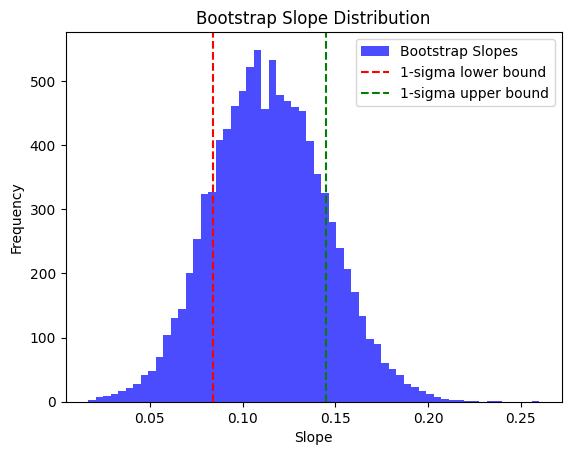

In [53]:
import random
#Number of bootstrap samples
n_bootstrap = 10000
N= len(max_obs_mag)


# Store bootstrap slopes
bootstrap_slopes = []


# Perform bootstrap resampling
for _ in range(n_bootstrap):
    # Resample data with replacement
    indices = np.random.randint(0, N, N) 

    resampled_mag = max_obs_mag[indices]
    resampled_log_dist = log_dist[indices]
    
    # Fit linear regression to the resampled data
    coefficients = np.polyfit(resampled_mag, resampled_log_dist, deg=1)
    slope = coefficients[0]
    
    # Store the slope
    bootstrap_slopes.append(slope)


bootstrap_slopes = np.sort(bootstrap_slopes)

# Compute the 1-sigma interval (16th and 84th percentiles)
lower_bound = np.percentile(bootstrap_slopes, 16)
upper_bound = np.percentile(bootstrap_slopes, 84)

# Print results
print(f"Bootstrap 1-sigma interval for the slope: ({lower_bound:.4f}, {upper_bound:.4f})")

alpha= 0.318
remove= int(n_bootstrap*alpha/2)
print(f"removing {remove} lowest and highest estimates")
cut= bootstrap_slopes[remove:-remove]
print(f"Mean slope: {np.mean(cut):.4f}")

# Plot the distribution of bootstrap slopes
plt.hist(bootstrap_slopes, bins=60, alpha=0.7, color='blue', label='Bootstrap Slopes')
plt.axvline(lower_bound, color='red', linestyle='--', label='1-sigma lower bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='1-sigma upper bound')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title('Bootstrap Slope Distribution')
plt.legend()
plt.show()


With the bootstrap method we get a distribution of possible slopes and a confidence interval of around (0.14, 0.22) for the gradient of the slope.

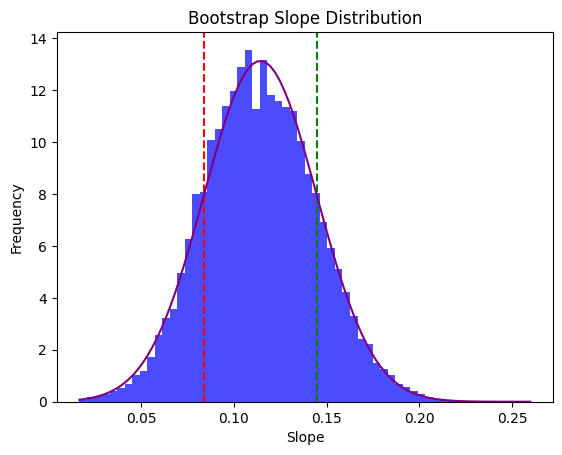

In [54]:
from scipy.stats import norm

plt.hist(bootstrap_slopes, bins=60, alpha=0.7, color='blue', label='Bootstrap Slopes', density=True)
plt.axvline(lower_bound, color='red', linestyle='--', label='1-sigma lower bound')
plt.axvline(upper_bound, color='green', linestyle='--', label='1-sigma upper bound')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.title('Bootstrap Slope Distribution')

# fit a gaussian distribution
x = np.linspace(min(bootstrap_slopes),max(bootstrap_slopes),100)
pdf= norm.pdf(x,np.mean(bootstrap_slopes),np.std(bootstrap_slopes))

plt.plot(x, pdf, 'purple')

plt.show()

And at last you can of course fit a gaussian distribution around it.

## References

1. Type Ia Supernova Explosions in Binary Systems: A Review (2023), Zheng-Wei Liu, Friedrich K. Röpke, Zhanwen Han
2. UBVRI light curves of 44 type Ia supernovae (2006), Jha S. , Kirshner R.P., Challis P. et.al
3. Type IA supernovae as standard candles (1992), Branch D. & Tammann G. A., 1992ARA&A..30..359B
4. COSMOS - The SAO Encyclopedia of Astronomy
https://astronomy.swin.edu.au/cosmos/T/Type+Ia+Supernova+Light+Curves
5. Secondary Maximum in the Near-Infrared Light Curves of Type Ia Supernovae (2006), Kasen D., 2006ApJ...649..939K
6. The absolute Magnitudes of Type Ia Supernovae (1993), Phillips M. M., 1993ApJ...413L.105P

## To do/ notes:


discuss the need for extinction corrections for sne in/behind dusty regions

how standard are standard candles? nearby SNe do seem standard, corrected by the shape of their lightcurve,but could be biased (metallicity ?)

type 1a sne crucial for determining cosmological models

we can do some hyp testing with the bootstrap

we can do some more methods/test for hyp testing